In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
#Load the California housing dataset from scikit-learn
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

#Create a pandas Dataframe from the dataset
df = pd.DataFrame(housing.data, columns=housing.feature_names)

#Add the target variable (house prices) to the DataFrame
df['Price'] = housing.target

#Print the shape of the dataset and display the first few rows
print("Dataset Shape:", df.shape)
print(df.head()) #Head of the data(first 5-6 data we will get it)

Dataset Shape: (20640, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


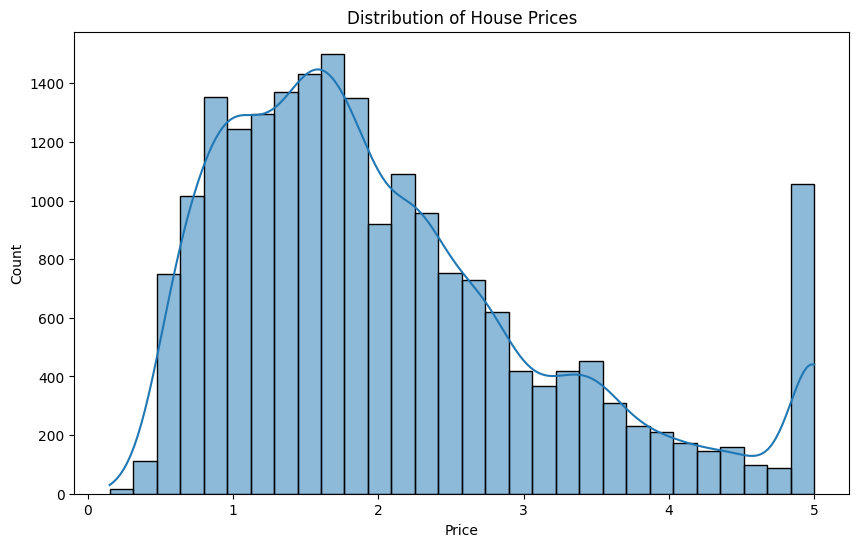

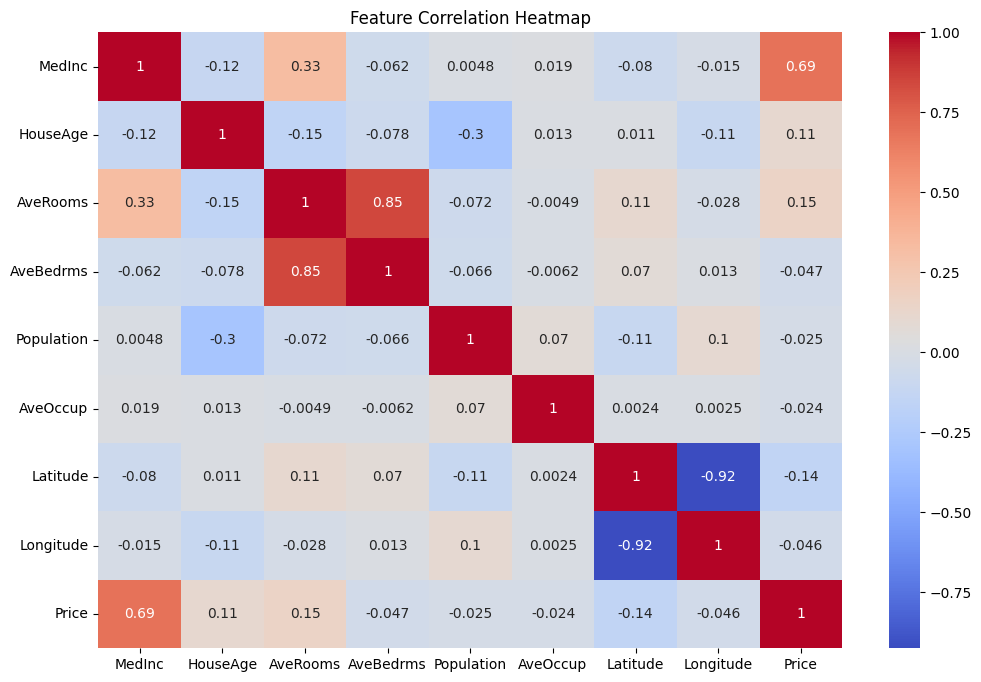

In [ ]:
#Plot the distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True) #Create a histogram with 30 lines/intervals kde = true means (do it)
plt.title('Distribution of House Prices') #Title
plt.show() #Display

#Plot a heatmap to visualise
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm') #Create a heatmap with given values
plt.title("Feature Correlation Heatmap")
plt.show() #Display the plot

In [ ]:
#Define the features (X) and the target varible (y)
X = df.drop('Price', axis = 1) #X contains all columns except PRICE
y = df['Price'] #y contains only the PRICE column

In [ ]:
#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#Initialize the Linear Regression model
model = LinearRegression()

#Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predict house prices on the scaled testing data
y_pred = model.predict(X_test)

In [ ]:
#Calculate evaluation metrics for the model
mse = mean_squared_error(y_test, y_pred) #Calculate Mean Squared Error
rmse = np.sqrt(mse) #Calculate Root Mean Squared Error
r2 = r2_score(y_test, y_pred) #Calculate R-Squared Score

#Print the calculaated metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R²-Squared Score: {r2:.2f}")

Mean Squared Error: 0.56
Root Mean Squared Error: 0.75
R²-Squared Score: 0.58


In [ ]:
#Variable as comparision to compare actual and predicted prices
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

#Print the Data
print(comparison_df.head())

        Actual  Predicted
20046  0.47700   0.719123
3024   0.45800   1.764017
15663  5.00001   2.709659
20484  2.18600   2.838926
9814   2.78000   2.604657


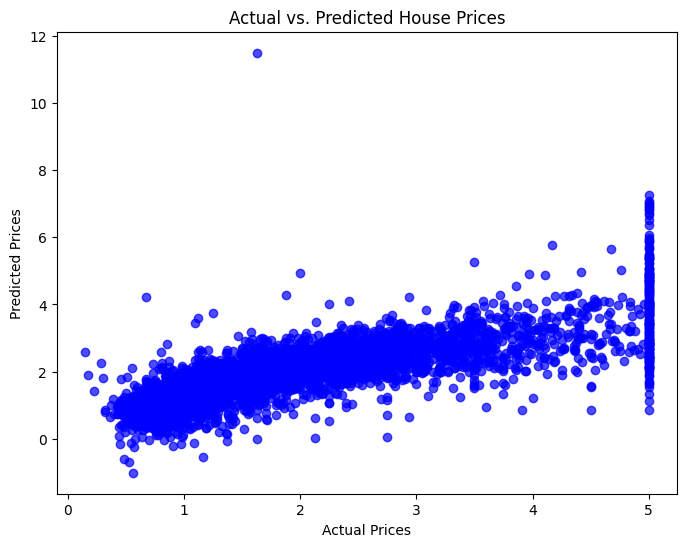

In [ ]:
#Plot a scatter plot to visualise the actual vs. predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha = 0.7, color = "blue") #Create a scatter plot with specified alpha and color
plt.xlabel("Actual Prices") #Set the X-axis label
plt.ylabel('Predicted Prices') #Set the Y-axis label
plt.title('Actual vs. Predicted House Prices') #Set the Title of the plot
plt.show() #Display the plot